# MODELOS SUPERVISADOS: PRÁCTICA FINAL

Alejandro Calles Moreno, Fernando Castillo Eibe, Pablo Hermoso Ferreiro

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (roc_curve, RocCurveDisplay, auc)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

random_state = 123
warnings.filterwarnings('ignore')

In [3]:
#Es necesario cambiar el delimitador a ';' para que se lea el archivo correctamente
data_bnb = pd.read_csv('airbnb-listings-extract.csv',delimiter=';', skiprows=0, low_memory=False)

In [4]:
data_bnb.shape

(14780, 89)

In [5]:
data_bnb.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [6]:
#Eliminar la columna 'listing url' ya que es redundante con el ID así como el resto de columnas con url links
data_bnb=data_bnb.drop(columns=['Listing Url','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL',
                               'Host Thumbnail Url','Host Picture Url',])

In [7]:
#La columna 'Has Availability solo tiene 12 filas con el valor 't' y el resto están vacias por lo que decido eliminarla
data_bnb=data_bnb.drop(columns=['Has Availability'])

In [8]:
#Se establece la columna 'id' como indice 
data_bnb=data_bnb.set_index(['ID'])

In [9]:
#Se eliminan el resto de IDs que no aportan valor predictivo así como la fecha de recolección de los datos
data_bnb=data_bnb.drop(columns=['Host ID','Scrape ID','Last Scraped'])

<AxesSubplot:>

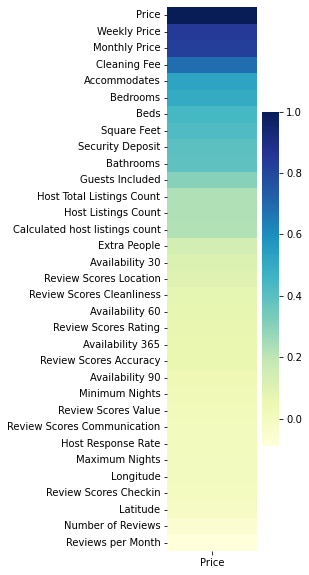

In [10]:
#Matriz de correlación respecto a la variable objetivo (Price)

corrMap=data_bnb.corr().loc[['Price']].sort_values('Price',ascending=False)
corrMap = corrMap.T.sort_values('Price',ascending=False)

plt.subplots(figsize=(2,10))
sns.heatmap(corrMap, cmap="YlGnBu")

In [11]:
#Se comprueba numericamente la correlacion de Weekly y Monthly Price con la variable objetivo
correlation1 = data_bnb['Price'].corr(data_bnb['Weekly Price'])
correlation2 = data_bnb['Price'].corr(data_bnb['Monthly Price'])

print(correlation1,correlation2)

0.8451442966159827 0.8281550597270412


In [12]:
#Dado que están muy correlacionadas, se decide eliminarlas
data_bnb=data_bnb.drop(columns=['Weekly Price','Monthly Price'])

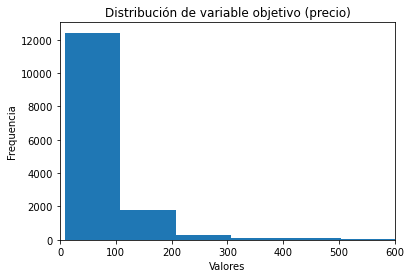

In [13]:
#Representación gráfica de la distribución de la variable Price
n, bins, patches=plt.hist(data_bnb['Price'])
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.title("Distribución de variable objetivo (precio)")
plt.xlim([0, 600])
plt.show()

In [14]:
#Tratamiento de la única variable categórica ('Host Response Time')
response_dummy = {'NO VALUE':0,'a few days or more':1,'within a day':2,'within a few hours':3,'within an hour':4}
data_bnb['Host Response Time'] = data_bnb['Host Response Time'].replace(response_dummy)

In [15]:
#Numero de datos missing en cada columna
nulos = data_bnb.isna().sum()
nulos.sort_values(ascending=False)

Host Acceptance Rate    14741
Jurisdiction Names      14553
License                 14431
Square Feet             14182
Notes                    9136
                        ...  
Availability 90             0
Availability 60             0
Availability 30             0
Calendar Updated            0
Accommodates                0
Length: 74, dtype: int64

In [16]:
#Calculo del porcentaje de valores nulos en cada columna
nulos100 = data_bnb.isna().sum()*100/data_bnb.shape[0]
nulos100.sort_values(ascending=False)

Host Acceptance Rate    99.736130
Jurisdiction Names      98.464141
License                 97.638701
Square Feet             95.953992
Notes                   61.813261
                          ...    
Availability 90          0.000000
Availability 60          0.000000
Availability 30          0.000000
Calendar Updated         0.000000
Accommodates             0.000000
Length: 74, dtype: float64

In [17]:
#Se decide eliminar las columnas 'Host Acceptance Rate' y 'Jurisdiction Names' por su elevado numero de NAs
data_bnb=data_bnb.drop(columns=['Host Acceptance Rate','Jurisdiction Names'])

In [18]:
#Separacion de las variables categoricas de las numericas filtrando por el tipo (object o no)
categoricas=(data_bnb.dtypes[data_bnb.dtypes=='object'].index.to_list())

numericas=(data_bnb.dtypes[data_bnb.dtypes!='object'].index.to_list())

In [19]:
#Tratamiento de los NAs
data_bnb[categoricas]=data_bnb[categoricas].fillna('NO VALUE')
data_bnb[numericas]=data_bnb[numericas].fillna(-500)

In [20]:
#Comprobacción
nulosCHECK = data_bnb.isna().sum()
nulosCHECK.sort_values(ascending=False)

Name                      0
Summary                   0
Availability 60           0
Availability 30           0
Calendar Updated          0
                         ..
Neighbourhood Cleansed    0
Neighbourhood             0
Street                    0
Host Verifications        0
Features                  0
Length: 72, dtype: int64

In [21]:
#Numero de categorias distintas para cada variable categorica
{i:data_bnb[i].nunique() for i in categoricas}

{'Name': 14376,
 'Summary': 13290,
 'Space': 10175,
 'Description': 14282,
 'Experiences Offered': 5,
 'Neighborhood Overview': 7913,
 'Notes': 4653,
 'Transit': 7840,
 'Access': 7129,
 'Interaction': 6586,
 'House Rules': 8031,
 'Host Name': 3277,
 'Host Since': 2117,
 'Host Location': 569,
 'Host About': 5008,
 'Host Neighbourhood': 396,
 'Host Verifications': 207,
 'Street': 1646,
 'Neighbourhood': 391,
 'Neighbourhood Cleansed': 478,
 'Neighbourhood Group Cleansed': 50,
 'City': 247,
 'State': 103,
 'Zipcode': 620,
 'Market': 44,
 'Smart Location': 257,
 'Country Code': 18,
 'Country': 18,
 'Property Type': 22,
 'Room Type': 3,
 'Bed Type': 5,
 'Amenities': 12380,
 'Calendar Updated': 57,
 'Calendar last Scraped': 38,
 'First Review': 1680,
 'Last Review': 786,
 'License': 317,
 'Cancellation Policy': 8,
 'Geolocation': 14780,
 'Features': 89}

**GEOLOCALIZACIÓN**

Se procederá a aplicar el la librería GEOPANDAS para llevar a cabo una distribución gráfica en un mapa real de los airbnbs en función de su precio y haciendo uso de las coordenadas de latitud y longitud.

In [21]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [22]:
data_bnb[['latitude','longitude']] = data_bnb.Geolocation.str.split(",",expand=True,)
geoloc = data_bnb[['Price','latitude','longitude']]

In [23]:
geoloc['longitude'] = pd.to_numeric(geoloc['longitude'], errors='coerce')
geoloc['latitude'] = pd.to_numeric(geoloc['latitude'], errors='coerce')
geoloc.dtypes

Price        float64
latitude     float64
longitude    float64
dtype: object

In [24]:
geoloc2 = round(geoloc,1)
geoloc2.head(5)

,Price,latitude,longitude
ID,,,
11210388,58.0,30.3,-97.9
17471131,70.0,41.4,2.2
17584891,70.0,41.4,2.2
5398030,229.0,41.4,2.2
18104606,149.0,41.4,2.2


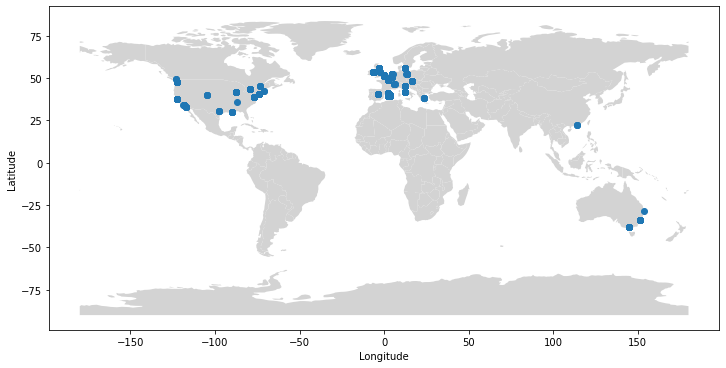

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(color="lightgrey", ax=ax)
x = geoloc2['longitude']
y = geoloc2['latitude']
z = geoloc2['Price']
plt.scatter(x, y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

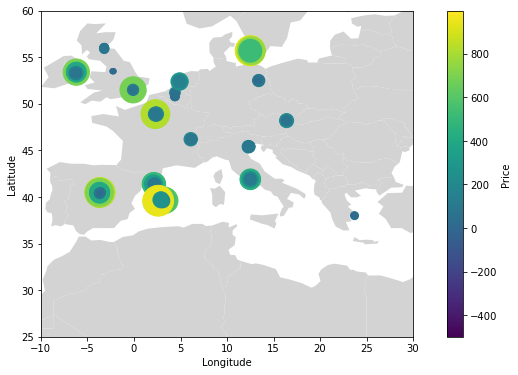

In [31]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(color="lightgrey", ax=ax)
x = geoloc2['longitude']
y = geoloc2['latitude']
z = geoloc2['Price']
plt.scatter(x, y, s=z, c=z)
plt.colorbar(label='Price')
plt.xlim([-10, 30])
plt.ylim([25, 60])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

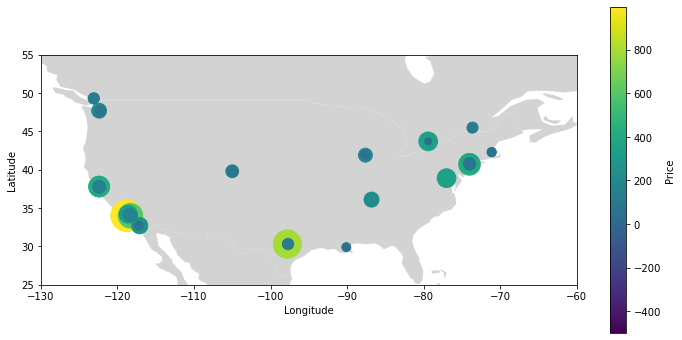

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(color="lightgrey", ax=ax)
x = geoloc2['longitude']
y = geoloc2['latitude']
z = geoloc2['Price']
plt.scatter(x, y, s=z, c=z)
plt.colorbar(label='Price')
plt.xlim([-130, -60])
plt.ylim([25, 55])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [22]:
#Separación en train, test y validation (no es necesario estratificar en este caso porque la variable objetivo es numerica)
data_train, test_val = train_test_split(data_bnb, test_size=0.4,random_state=123)
data_test, data_valid = train_test_split(test_val,test_size=0.5,random_state=123)

In [23]:
X_train = data_train.drop(columns='Price')
Y_train = data_train['Price']

X_test = data_test.drop(columns='Price')
Y_test = data_test['Price']

X_valid = data_valid.drop(columns='Price')
Y_valid = data_valid['Price']

In [24]:
#Seleccionamos solo las datas numéricas para proceder con el modelo
data_numericas = data_bnb[numericas]

**NORMALIZACION**

In [25]:
scaler = StandardScaler()
train_scaler = scaler.fit(data_numericas)

data_numericas = pd.DataFrame(index=data_numericas.index, columns=data_numericas.columns,
                              data=train_scaler.transform(data_numericas))

In [26]:
data_train, test_val = train_test_split(data_numericas, test_size=0.4,random_state=123)
data_test, data_valid = train_test_split(test_val,test_size=0.5,random_state=123)

In [27]:
X_train = data_train.drop(columns='Price')
Y_train = data_train['Price']

X_test = data_test.drop(columns='Price')
Y_test = data_test['Price']

X_valid = data_valid.drop(columns='Price')
Y_valid = data_valid['Price']

In [28]:
#PCA para reducción de dimensión y outliers
from sklearn.decomposition import PCA

In [29]:
pca = PCA(32, random_state=123, whiten=False)

In [30]:
data_transformed = pca.fit_transform(data_train)

In [31]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

<AxesSubplot:>

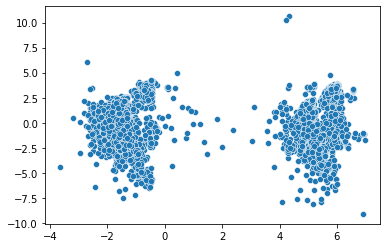

In [32]:
#Representación de scatterplot
sns.scatterplot(data_transformed[:,0], data_transformed[:,1])

In [33]:
data_transformed[0,0]

-0.9565843287455008

In [34]:
data_train.iloc[0,0]

-2.604401113760846

In [35]:
pc_1 = pca.components_[0,:]

In [36]:
x_1 = data_train.iloc[0,:].to_numpy()

In [37]:
np.dot(pc_1, x_1)

-0.9595219963672472

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26855489, 0.37534296, 0.47681908, 0.5404609 , 0.59316704,
       0.64258397, 0.68890138, 0.73245727, 0.7682828 , 0.80103652,
       0.83243354, 0.86267566, 0.88776461, 0.90734547, 0.92611493,
       0.94390412, 0.96118518, 0.97274871, 0.98356898, 0.99034894,
       0.99458539, 0.99665806, 0.99846656, 0.99911384, 0.99957469,
       0.99973305, 0.99980783, 0.99988041, 0.99994452, 0.99998099,
       1.        , 1.        ])

In [39]:
#Buscamos componentes que tengan mínimo un 90% de varianza explicada
[i for i,el in enumerate(np.cumsum(pca.explained_variance_ratio_)) if el > 0.90]

[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [40]:
#Explicar ahora la varianza pero con 13 componentes
pca = PCA(13, random_state=100,whiten=False)

In [41]:
data_transformed = pca.fit_transform(data_train)

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26855489, 0.37534296, 0.47681908, 0.5404609 , 0.59316704,
       0.64258397, 0.68890138, 0.73245727, 0.7682828 , 0.80103652,
       0.83243354, 0.86267566, 0.88776461])

In [43]:
#Aplicar transformación inversa para comprobar la calidad de la recuperacion de los datos originales
#y ver cómo de bueno es el PCA
recovery_x = pca.inverse_transform(data_transformed)

In [44]:
data_transformed.shape

(8868, 13)

In [45]:
recovery_x.shape

(8868, 32)

In [46]:
original_x = data_train.to_numpy()

In [47]:
#Hacemos la resta al cuadrado de los valores originales menos los puntos recuperados para obtener el error "score"
rest_x = (original_x - recovery_x)**2

In [48]:
score = np.sum(rest_x,1)

In [49]:
score_mean = np.mean(score)
score_mean

3.5768987219499206

In [50]:
score_std = np.std(score)

In [51]:
#Después de probar con varias opciones, he buscado outliers que sean 5 veces mayores a la media
outliers = np.where(score>score_mean + 5*score_std)

In [52]:
#Y se obtienen 56 valores outliers
outliers

(array([ 129,  489,  623,  656,  674,  694,  789,  792,  952, 1011, 1091,
        1107, 1153, 1288, 1734, 1844, 1959, 2340, 2416, 2588, 2650, 2981,
        2992, 3150, 3174, 3583, 3654, 3899, 4048, 4053, 4111, 4328, 4692,
        4747, 5103, 5353, 5420, 5473, 5821, 6177, 6211, 6295, 6468, 6508,
        6737, 6741, 6752, 6848, 7352, 7465, 7702, 7853, 7909, 8010, 8122,
        8864], dtype=int64),)

In [53]:
#Localizamos con la función iloc las columnas asociadas a cada outlier detectado (mostrar solo los 10 primeros)
data_train.iloc[outliers].head(10)

,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
ID,,,,,,,,,,,,,,,,,,,,,
1160005,0.381423,0.408928,0.160373,0.160373,-0.018974,0.011221,-0.132465,-16.358581,0.024450,0.021456,...,-0.147099,0.545625,0.541609,0.536689,0.537097,0.539898,0.537831,0.539407,0.345149,0.515506
502918,0.387359,0.408928,-0.327310,-0.327310,-0.018537,0.011646,-1.086108,0.051873,0.024450,0.021456,...,-0.120982,0.561843,0.541609,0.541394,0.541790,0.539898,0.542524,0.544102,-0.333099,0.520219
6899113,-2.604401,-2.597821,-14.699589,-14.699589,-0.012595,0.010713,-1.086108,0.051873,0.024450,0.021456,...,-0.591092,-1.862736,-1.855728,-1.857888,-1.851780,-1.857895,-1.850707,-1.850344,-0.333099,-1.916773
11360130,0.375487,0.388883,-0.327310,-0.327310,2.794286,0.113251,-0.609287,0.051873,0.024450,0.021456,...,-0.486623,0.541570,0.541609,0.541394,0.541790,0.535196,0.537831,0.539407,-20.321492,0.524251
1518589,0.375487,0.388883,3.861019,3.861019,-0.177482,0.481980,6.066218,0.182895,0.363907,0.471222,...,-0.460506,0.537516,0.536909,0.541394,0.537097,0.539898,0.533139,0.539407,4.773715,0.513174
696928,0.387359,0.408928,-0.298622,-0.298622,-0.014457,0.013119,-0.132465,0.051873,0.024450,-17.311841,...,-0.408271,0.513189,0.532208,0.536689,0.537097,0.539898,0.542524,0.530017,-0.293202,0.517449
6312250,0.381423,0.283647,4.348701,4.348701,-0.015349,0.010340,0.344357,0.051873,-24.270920,0.056053,...,-0.591092,-1.862736,-1.855728,-1.857888,-1.851780,-1.857895,-1.850707,-1.850344,5.412067,-1.916773
1101760,0.387359,0.408928,-0.212561,-0.212561,-0.018438,0.011414,0.344357,0.051873,0.024450,0.056053,...,4.318941,0.549679,0.541609,0.536689,0.541790,0.539898,0.542524,0.544102,-0.173511,0.531685
1605637,0.387359,0.408928,-0.126499,-0.126499,-0.016323,0.011221,0.344357,0.051873,-24.270920,0.056053,...,4.057769,0.517243,0.536909,0.536689,0.541790,0.539898,0.542524,0.539407,-0.053820,0.532657


<AxesSubplot:>

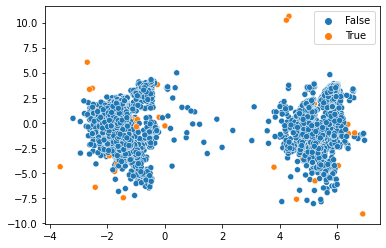

In [54]:
#Para identificar visualmente los outliers en un scatterplot
mark_outlier = np.where(score>score_mean + 5*score_std, True, False)
sns.scatterplot(data_transformed[:,0],data_transformed[:,1],hue=mark_outlier)

**XGBoost**

In [97]:
import xgboost as xgb

In [98]:
reg = xgb.XGBRegressor(n_estimators=31, objective='reg:squarederror')

In [100]:
reg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=31, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [101]:
reg.score(X_train, Y_train)

0.8730370862730344

In [102]:
reg.score(X_test, Y_test)

0.28460533225880535

In [60]:
rmse_xgboost = mean_squared_error(Y_test, reg.predict(X_test), squared=False)
rmse_xgboost

0.8549552673409325

In [61]:
xgboost_error = round(np.mean(100*np.sqrt((Y_test - reg.predict(X_test))**2)/Y_test),2)
xgboost_error

21.38

In [62]:
predicted_xgboost = reg.predict(X_test)

In [63]:
predicted_xgboost

array([-0.05085997,  0.07840893, -0.05614967, ..., -0.49511912,
        0.21759942,  0.0379765 ], dtype=float32)

In [103]:
#Features importances
importance = reg.feature_importances_

In [104]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02002
Feature: 1, Score: 0.00737
Feature: 2, Score: 0.01845
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02351
Feature: 5, Score: 0.02203
Feature: 6, Score: 0.08738
Feature: 7, Score: 0.09454
Feature: 8, Score: 0.28351
Feature: 9, Score: 0.01076
Feature: 10, Score: 0.01201
Feature: 11, Score: 0.02016
Feature: 12, Score: 0.08005
Feature: 13, Score: 0.03274
Feature: 14, Score: 0.03806
Feature: 15, Score: 0.01211
Feature: 16, Score: 0.02044
Feature: 17, Score: 0.02635
Feature: 18, Score: 0.02678
Feature: 19, Score: 0.02264
Feature: 20, Score: 0.02860
Feature: 21, Score: 0.01343
Feature: 22, Score: 0.00748
Feature: 23, Score: 0.00560
Feature: 24, Score: 0.00902
Feature: 25, Score: 0.00802
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01326
Feature: 28, Score: 0.00562
Feature: 29, Score: 0.00931
Feature: 30, Score: 0.04077


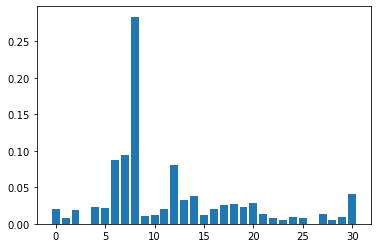

In [107]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**GradientBoost**

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
boost = GradientBoostingRegressor()

In [66]:
boost.fit(X_train, Y_train)

GradientBoostingRegressor()

In [67]:
boost.score(X_train, Y_train)

0.6827260904738602

In [68]:
boost.score(X_test, Y_test)

0.280594326130694

In [69]:
rmse_gboost = mean_squared_error(Y_test, boost.predict(X_test), squared=False)
rmse_gboost

0.8573486578204983

In [70]:
gboost_error = round(np.mean(100*np.sqrt((Y_test - boost.predict(X_test))**2)/Y_test),2)
gboost_error

19.44

In [71]:
predicted_gboost = boost.predict(X_test)

In [72]:
predicted_gboost

array([-0.06351873,  0.2138127 ,  0.0321743 , ..., -0.5272271 ,
        0.08781481, -0.07992222])

In [140]:
#Features importances
importance1 = boost.feature_importances_

In [141]:
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00260
Feature: 1, Score: 0.00347
Feature: 2, Score: 0.00342
Feature: 3, Score: 0.00276
Feature: 4, Score: 0.07755
Feature: 5, Score: 0.03466
Feature: 6, Score: 0.13567
Feature: 7, Score: 0.13728
Feature: 8, Score: 0.20295
Feature: 9, Score: 0.00601
Feature: 10, Score: 0.00099
Feature: 11, Score: 0.01195
Feature: 12, Score: 0.18045
Feature: 13, Score: 0.01724
Feature: 14, Score: 0.06752
Feature: 15, Score: 0.00296
Feature: 16, Score: 0.00552
Feature: 17, Score: 0.02226
Feature: 18, Score: 0.00680
Feature: 19, Score: 0.03167
Feature: 20, Score: 0.02179
Feature: 21, Score: 0.00156
Feature: 22, Score: 0.00351
Feature: 23, Score: 0.00009
Feature: 24, Score: 0.00039
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00224
Feature: 28, Score: 0.00011
Feature: 29, Score: 0.00080
Feature: 30, Score: 0.01579


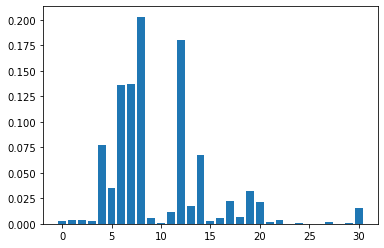

In [142]:
pyplot.bar([x for x in range(len(importance))], importance1)
pyplot.show()

Tras probar con los dos algoritmos más potentes para llevar a cabo la regresión, los resultados otorgan un mayor score a XGBoost pero un menor error al GradientBoost.

**K-folds cross validator**

In [73]:
from sklearn.model_selection import KFold

In [74]:
Xkf = data_numericas.drop(columns='Price')
Ykf = data_numericas['Price']

In [75]:
kf = KFold(n_splits=10)

In [76]:
kf.get_n_splits(Xkf)

10

In [77]:
for train_index, test_index in kf.split(Xkf):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 1478  1479  1480 ... 14777 14778 14779] TEST: [   0    1    2 ... 1475 1476 1477]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [1478 1479 1480 ... 2953 2954 2955]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [2956 2957 2958 ... 4431 4432 4433]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [4434 4435 4436 ... 5909 5910 5911]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [5912 5913 5914 ... 7387 7388 7389]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [7390 7391 7392 ... 8865 8866 8867]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [ 8868  8869  8870 ... 10343 10344 10345]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [10346 10347 10348 ... 11821 11822 11823]
TRAIN: [    0     1     2 ... 14777 14778 14779] TEST: [11824 11825 11826 ... 13299 13300 13301]
TRAIN: [    0     1     2 ... 13299 13300 13301] TEST: [13302 13303 13304 ... 14777 14778 14779]


In [78]:
Xkf_train, Xkf_test = train_index, test_index

**CONSTRUCCIÓN DE RED NEURONAL CON KERAS**

In [79]:
from tensorflow import keras 

In [80]:
#Formato de entrada
inputs = tf.keras.Input(shape=(X_train.shape[1],))

#Enlazando las capas (MLP)
x = tf.keras.layers.Dense(254, activation="relu")(inputs)
x = tf.keras.layers.Dense(254, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)

#Capa de salida
output = tf.keras.layers.Dense(1)(x)

#Creación del modelo indicando las salidas y las entradas
model = tf.keras.Model(inputs, output)

In [81]:
#Compilación
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=tf.keras.metrics.RootMeanSquaredError(name='rmse'))

In [82]:
#Entrenamiento
model.fit(X_train.to_numpy(),
          Y_train.to_numpy(), 
          epochs=100, 
          validation_data=(X_test.to_numpy(),Y_test.to_numpy()),
          )

Epoch 1/100
278/278 [==============================] - 2s 4ms/step - loss: 0.7351 - rmse: 0.8574 - val_loss: 0.7202 - val_rmse: 0.8487
Epoch 2/100
278/278 [==============================] - 1s 3ms/step - loss: 0.6567 - rmse: 0.8104 - val_loss: 0.7428 - val_rmse: 0.8619
Epoch 3/100
278/278 [==============================] - 1s 2ms/step - loss: 0.6153 - rmse: 0.7844 - val_loss: 0.7299 - val_rmse: 0.8544
Epoch 4/100
278/278 [==============================] - 1s 2ms/step - loss: 0.5847 - rmse: 0.7646 - val_loss: 0.7040 - val_rmse: 0.8391
Epoch 5/100
278/278 [==============================] - 1s 3ms/step - loss: 0.5765 - rmse: 0.7593 - val_loss: 0.7265 - val_rmse: 0.8524
Epoch 6/100
278/278 [==============================] - 1s 3ms/step - loss: 0.5388 - rmse: 0.7340 - val_loss: 0.6775 - val_rmse: 0.8231
Epoch 7/100
278/278 [==============================] - 1s 3ms/step - loss: 0.5332 - rmse: 0.7302 - val_loss: 0.7082 - val_rmse: 0.8415
Epoch 8/100
278/278 [==============================] - 

278/278 [==============================] - 1s 3ms/step - loss: 0.2180 - rmse: 0.4669 - val_loss: 0.7597 - val_rmse: 0.8716
Epoch 62/100
278/278 [==============================] - 1s 3ms/step - loss: 0.2083 - rmse: 0.4564 - val_loss: 0.7440 - val_rmse: 0.8625
Epoch 63/100
278/278 [==============================] - 1s 3ms/step - loss: 0.2121 - rmse: 0.4606 - val_loss: 0.7647 - val_rmse: 0.8745
Epoch 64/100
278/278 [==============================] - 1s 3ms/step - loss: 0.2056 - rmse: 0.4535 - val_loss: 0.8351 - val_rmse: 0.9138
Epoch 65/100
278/278 [==============================] - 1s 3ms/step - loss: 0.1983 - rmse: 0.4454 - val_loss: 0.8879 - val_rmse: 0.9423
Epoch 66/100
278/278 [==============================] - 1s 3ms/step - loss: 0.1929 - rmse: 0.4392 - val_loss: 0.8507 - val_rmse: 0.9223
Epoch 67/100
278/278 [==============================] - 1s 3ms/step - loss: 0.2088 - rmse: 0.4569 - val_loss: 0.8495 - val_rmse: 0.9217
Epoch 68/100
278/278 [==============================] - 1s 3m

In [83]:
data_tensor = data_numericas.drop(columns='Price')

In [84]:
predicted_data_norm = data_numericas.copy()
predicted_data_norm['Price'] = model.predict(data_tensor.to_numpy())
predicted_data_unorm = pd.DataFrame(index=predicted_data_norm.index, columns=predicted_data_norm.columns, data=train_scaler.inverse_transform(predicted_data_norm))
predicted_data_unorm['predicted_price'] = predicted_data_unorm['Price']
predicted_data_unorm['Price'] = data_numericas['Price']

462/462 [==============================] - 1s 1ms/step


In [85]:
rmse_nn = round(np.mean(100*np.sqrt((predicted_data_unorm['Price'] - 
                                     predicted_data_unorm['predicted_price'])**2)/predicted_data_unorm['Price']),2)
rmse_nn

9439.68

In [87]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense (Dense)               (None, 254)               8128      
                                                                 
 dense_1 (Dense)             (None, 254)               64770     
                                                                 
 dense_2 (Dense)             (None, 64)                16320     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 93,443
Trainable params: 93,443
Non-trainable p

**REGULARIZACIÓN**

In [129]:
###Primero regularización con L1 (LASSO)

#Formato de entrada
inputs = tf.keras.Input(shape=(X_train.shape[1],))

#Enlazando las capas (MLP)
x = tf.keras.layers.Dense(254, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.002))(inputs)
x = tf.keras.layers.Dense(254, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.002))(x)
x = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.002))(x)
x = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.002))(x)

#Capa de salida
output = tf.keras.layers.Dense(1)(x)

#Creación del modelo indicando las salidas y las entradas
model1 = tf.keras.Model(inputs, output)

In [130]:
#Compilación
model1.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=tf.keras.metrics.RootMeanSquaredError(name='rmse'))

In [131]:
#Entrenamiento
model1.fit(X_train.to_numpy(),
          Y_train.to_numpy(), 
          epochs=100, 
          validation_data=(X_test.to_numpy(),Y_test.to_numpy()),
          )

Epoch 1/100
278/278 [==============================] - 2s 4ms/step - loss: 4.5834 - rmse: 0.8612 - val_loss: 1.8585 - val_rmse: 0.8680
Epoch 2/100
278/278 [==============================] - 1s 3ms/step - loss: 1.3691 - rmse: 0.8337 - val_loss: 1.1475 - val_rmse: 0.8578
Epoch 3/100
278/278 [==============================] - 1s 3ms/step - loss: 0.9981 - rmse: 0.8234 - val_loss: 1.0173 - val_rmse: 0.8720
Epoch 4/100
278/278 [==============================] - 1s 3ms/step - loss: 0.8842 - rmse: 0.8155 - val_loss: 0.9160 - val_rmse: 0.8526
Epoch 5/100
278/278 [==============================] - 1s 3ms/step - loss: 0.8261 - rmse: 0.8064 - val_loss: 0.8908 - val_rmse: 0.8550
Epoch 6/100
278/278 [==============================] - 1s 3ms/step - loss: 0.7978 - rmse: 0.8020 - val_loss: 0.8523 - val_rmse: 0.8415
Epoch 7/100
278/278 [==============================] - 1s 3ms/step - loss: 0.7672 - rmse: 0.7932 - val_loss: 0.8564 - val_rmse: 0.8481
Epoch 8/100
278/278 [==============================] - 

278/278 [==============================] - 1s 5ms/step - loss: 0.5460 - rmse: 0.6588 - val_loss: 0.9534 - val_rmse: 0.9172
Epoch 62/100
278/278 [==============================] - 1s 5ms/step - loss: 0.5471 - rmse: 0.6591 - val_loss: 0.9589 - val_rmse: 0.9200
Epoch 63/100
278/278 [==============================] - 1s 5ms/step - loss: 0.5532 - rmse: 0.6640 - val_loss: 0.8645 - val_rmse: 0.8678
Epoch 64/100
278/278 [==============================] - 1s 5ms/step - loss: 0.5430 - rmse: 0.6566 - val_loss: 0.9527 - val_rmse: 0.9168
Epoch 65/100
278/278 [==============================] - 2s 5ms/step - loss: 0.5457 - rmse: 0.6585 - val_loss: 0.8873 - val_rmse: 0.8808
Epoch 66/100
278/278 [==============================] - 1s 5ms/step - loss: 0.5411 - rmse: 0.6551 - val_loss: 0.9752 - val_rmse: 0.9290
Epoch 67/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5392 - rmse: 0.6538 - val_loss: 0.9420 - val_rmse: 0.9113
Epoch 68/100
278/278 [==============================] - 2s 6m

In [132]:
predicted_data_norm = data_numericas.copy()
predicted_data_norm['Price'] = model1.predict(data_tensor.to_numpy())
predicted_data_unorm = pd.DataFrame(index=predicted_data_norm.index, columns=predicted_data_norm.columns, data=train_scaler.inverse_transform(predicted_data_norm))
predicted_data_unorm['predicted_price'] = predicted_data_unorm['Price']
predicted_data_unorm['Price'] = data_numericas['Price']

462/462 [==============================] - 1s 1ms/step


In [133]:
rmse_nn1 = round(np.mean(100*np.sqrt((predicted_data_unorm['Price'] - 
                                     predicted_data_unorm['predicted_price'])**2)/predicted_data_unorm['Price']),2)
rmse_nn1

8757.17

In [134]:
###Primero regularización con L2 (RIDGE)

#Formato de entrada
inputs = tf.keras.Input(shape=(X_train.shape[1],))

#Enlazando las capas (MLP)
x = tf.keras.layers.Dense(254, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(inputs)
x = tf.keras.layers.Dense(254, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(x)
x = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(x)
x = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(x)

#Capa de salida
output = tf.keras.layers.Dense(1)(x)

#Creación del modelo indicando las salidas y las entradas
model2 = tf.keras.Model(inputs, output)

In [135]:
#Compilación
model2.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=tf.keras.metrics.RootMeanSquaredError(name='rmse'))

In [136]:
#Entrenamiento
model2.fit(X_train.to_numpy(),
          Y_train.to_numpy(), 
          epochs=100, 
          validation_data=(X_test.to_numpy(),Y_test.to_numpy()),
          )

Epoch 1/100
278/278 [==============================] - 2s 4ms/step - loss: 1.4212 - rmse: 0.8668 - val_loss: 1.2575 - val_rmse: 0.8682
Epoch 2/100
278/278 [==============================] - 1s 3ms/step - loss: 1.0972 - rmse: 0.8202 - val_loss: 1.2043 - val_rmse: 0.9198
Epoch 3/100
278/278 [==============================] - 1s 3ms/step - loss: 0.9619 - rmse: 0.8068 - val_loss: 1.0261 - val_rmse: 0.8700
Epoch 4/100
278/278 [==============================] - 1s 3ms/step - loss: 0.8637 - rmse: 0.7888 - val_loss: 0.9115 - val_rmse: 0.8346
Epoch 5/100
278/278 [==============================] - 1s 3ms/step - loss: 0.7912 - rmse: 0.7720 - val_loss: 0.8782 - val_rmse: 0.8365
Epoch 6/100
278/278 [==============================] - 1s 3ms/step - loss: 0.7466 - rmse: 0.7619 - val_loss: 0.9060 - val_rmse: 0.8674
Epoch 7/100
278/278 [==============================] - 1s 3ms/step - loss: 0.7326 - rmse: 0.7661 - val_loss: 0.8264 - val_rmse: 0.8308
Epoch 8/100
278/278 [==============================] - 

278/278 [==============================] - 1s 4ms/step - loss: 0.4174 - rmse: 0.5828 - val_loss: 1.0317 - val_rmse: 0.9765
Epoch 62/100
278/278 [==============================] - 1s 3ms/step - loss: 0.4180 - rmse: 0.5828 - val_loss: 1.1008 - val_rmse: 1.0107
Epoch 63/100
278/278 [==============================] - 1s 3ms/step - loss: 0.4076 - rmse: 0.5740 - val_loss: 1.0212 - val_rmse: 0.9714
Epoch 64/100
278/278 [==============================] - 1s 3ms/step - loss: 0.4064 - rmse: 0.5735 - val_loss: 1.1269 - val_rmse: 1.0242
Epoch 65/100
278/278 [==============================] - 1s 3ms/step - loss: 0.4194 - rmse: 0.5844 - val_loss: 1.1211 - val_rmse: 1.0212
Epoch 66/100
278/278 [==============================] - 1s 4ms/step - loss: 0.3909 - rmse: 0.5601 - val_loss: 0.9527 - val_rmse: 0.9367
Epoch 67/100
278/278 [==============================] - 1s 3ms/step - loss: 0.4384 - rmse: 0.6015 - val_loss: 0.9940 - val_rmse: 0.9573
Epoch 68/100
278/278 [==============================] - 1s 3m

In [137]:
predicted_data_norm = data_numericas.copy()
predicted_data_norm['Price'] = model2.predict(data_tensor.to_numpy())
predicted_data_unorm = pd.DataFrame(index=predicted_data_norm.index, columns=predicted_data_norm.columns, data=train_scaler.inverse_transform(predicted_data_norm))
predicted_data_unorm['predicted_price'] = predicted_data_unorm['Price']
predicted_data_unorm['Price'] = data_numericas['Price']

462/462 [==============================] - 1s 1ms/step


In [138]:
rmse_nn2 = round(np.mean(100*np.sqrt((predicted_data_unorm['Price'] - 
                                     predicted_data_unorm['predicted_price'])**2)/predicted_data_unorm['Price']),2)
rmse_nn2

9775.93

Tras entrenar la red neuronal sin regularización y con regularización L1 y L2, se observa que se obtiene un mejor resultado (menor error) con regularización L1 (LASSO)

**TRATAMIENTO DEL TEXTO**

In [109]:
from sentence_transformers import SentenceTransformer

Tras un considerado número de intentos, hemos decidido no incluir el tratamiento de texto en el análisis ya que nos proporcionaba muchos errores y no hemos logrado transformar todo el texto para incluirlo en la red neuronal.